<a href="https://colab.research.google.com/github/dev6589/Zomato-Data-Analysis/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [6]:
!unzip "/content/zomato worldwide.zip"

Archive:  /content/zomato worldwide.zip
replace Country-Code.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Country-Code.xlsx       
replace file1.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: file1.json              
replace file2.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: file2.json              
replace file3.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: file3.json              
replace file4.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: file4.json              
replace file5.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: file5.json              
replace zomato.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: zomato.csv              


**EDA**

In [7]:
zomato_data = pd.read_csv("/content/zomato.csv",encoding='latin-1')

In [40]:
zomato_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [9]:
zomato_india = zomato_data[zomato_data['Country Code']==1] # Extract the data for India, country code = 1

In [10]:
zomato_india.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [11]:
zomato_india.shape

(8652, 21)

In [12]:
zomato_india['City'].value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Guwahati          21
Amritsar          21
Lucknow           21
Ahmedabad         21
Bhubaneshwar      21
Puducherry        20
Vizag             20
Bhopal            20
Kanpur            20
Agra              20
Dehradun          20
Aurangabad        20
Nagpur            20
Patna             20
Nashik            20
Goa               20
Vadodara          20
Ludhiana          20
Mysore            20
Indore            20
Coimbatore        20
Kolkata           20
Jaipur            20
Pune              20
Bangalore         20
Surat             20
Ranchi            20
Allahabad         20
Chennai           20
Mangalore         20
Kochi             20
Mumbai            20
Varanasi          20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64

In [13]:
# Extracting the data for Delhi NCR

zomato_ncr = zomato_india[(zomato_india['City']=='New Delhi') | (zomato_india['City']=='Gurgaon') | (zomato_india['City']=='Faridabad') | (zomato_india['City']=='Noida') | (zomato_india['City']=='Ghaziabad')]

In [14]:
zomato_ncr.shape

(7947, 21)

In [15]:
zomato_ncr.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
865,301728,Desire Foods,1,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",250,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4
866,5992,Knight Rock,1,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",500,Indian Rupees(Rs.),No,No,No,No,2,2.8,Orange,Average,16
867,301730,Punjab Restaurant,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305563,28.490137,North Indian,150,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,8
868,301729,Raju Dhaba,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.306102,28.490098,North Indian,150,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,8
869,301731,Rakheja Bakery,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305745,28.490062,Bakery,100,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,7


In [ ]:
zomato_ncr.drop(['Country Code', 'Currency'], axis=1, inplace=True)# Dropping the unnecessary cols

In [42]:
zomato_ncr.head()

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
865,301728,Desire Foods,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",250,0,0,0,0,1,2.9,Orange,Average,4
866,5992,Knight Rock,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",500,0,0,0,0,2,2.8,Orange,Average,16
867,301730,Punjab Restaurant,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305563,28.490137,North Indian,150,0,0,0,0,1,2.8,Orange,Average,8
868,301729,Raju Dhaba,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.306102,28.490098,North Indian,150,0,0,0,0,1,2.9,Orange,Average,8
869,301731,Rakheja Bakery,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305745,28.490062,Bakery,100,0,0,0,0,1,2.8,Orange,Average,7


In [18]:
# Checking the type of features

zomato_ncr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7947 entries, 865 to 9112
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         7947 non-null   int64  
 1   Restaurant Name       7947 non-null   object 
 2   City                  7947 non-null   object 
 3   Address               7947 non-null   object 
 4   Locality              7947 non-null   object 
 5   Locality Verbose      7947 non-null   object 
 6   Longitude             7947 non-null   float64
 7   Latitude              7947 non-null   float64
 8   Cuisines              7947 non-null   object 
 9   Average Cost for two  7947 non-null   int64  
 10  Has Table booking     7947 non-null   object 
 11  Has Online delivery   7947 non-null   object 
 12  Is delivering now     7947 non-null   object 
 13  Switch to order menu  7947 non-null   object 
 14  Price range           7947 non-null   int64  
 15  Aggregate rating   

In [19]:
# Checking for null values

zomato_ncr.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [20]:
# Encode the boolean values

boolean_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']

# Create Encoding

encoding = {"Yes" : 1, "No" : 0}

# Encoding using lambda function
for col in boolean_columns:
  zomato_ncr[col]=zomato_ncr[col].apply(lambda x : encoding[x])

# Print the boolean data

zomato_ncr[boolean_columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu
865,0,0,0,0
866,0,0,0,0
867,0,0,0,0
868,0,0,0,0
869,0,0,0,0
...,...,...,...,...
9108,0,1,0,0
9109,0,0,0,0
9110,0,0,0,0
9111,0,0,0,0


In [21]:
zomato_ncr.head()

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
865,301728,Desire Foods,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",250,0,0,0,0,1,2.9,Orange,Average,4
866,5992,Knight Rock,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",500,0,0,0,0,2,2.8,Orange,Average,16
867,301730,Punjab Restaurant,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305563,28.490137,North Indian,150,0,0,0,0,1,2.8,Orange,Average,8
868,301729,Raju Dhaba,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.306102,28.490098,North Indian,150,0,0,0,0,1,2.9,Orange,Average,8
869,301731,Rakheja Bakery,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305745,28.490062,Bakery,100,0,0,0,0,1,2.8,Orange,Average,7


In [22]:
# Check the number of unique restaurants

pd.set_option('display.max_rows', None) # --> Allows me to print all max rows
zomato_ncr['Restaurant Name'].value_counts()

Cafe Coffee Day                                       83
Domino's Pizza                                        77
Subway                                                62
Green Chick Chop                                      51
McDonald's                                            46
Keventers                                             34
Giani                                                 29
Baskin Robbins                                        28
Giani's                                               22
Dunkin' Donuts                                        22
Barista                                               22
Pizza Hut                                             20
Costa Coffee                                          20
Pizza Hut Delivery                                    19
Wah Ji Wah                                            19
Twenty Four Seven                                     19
Chaayos                                               18
Republic of Chicken            

In [23]:
# Checking the restaurants with more than 5 outlets

more_than_5_outlets = {}

for restaurant, val in zip(zomato_ncr['Restaurant Name'].value_counts().index, zomato_ncr['Restaurant Name'].value_counts()):

  #If the value is >= 5, then append 
  if val >=5:
    more_than_5_outlets[restaurant] = val

# Print the count
print("Restaurants in Delhi-NCR having more than 5 outlets {}".format(len(more_than_5_outlets.keys())))


Restaurants in Delhi-NCR having more than 5 outlets 102


In [24]:
more_than_5_outlets.values()

dict_values([83, 77, 62, 51, 46, 34, 29, 28, 22, 22, 22, 20, 20, 19, 19, 19, 18, 18, 17, 17, 17, 16, 15, 15, 14, 14, 14, 14, 13, 13, 13, 12, 12, 12, 12, 11, 11, 11, 10, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

Hence only 102 restaurants in Delhi NCR have more than 5 outlets.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)


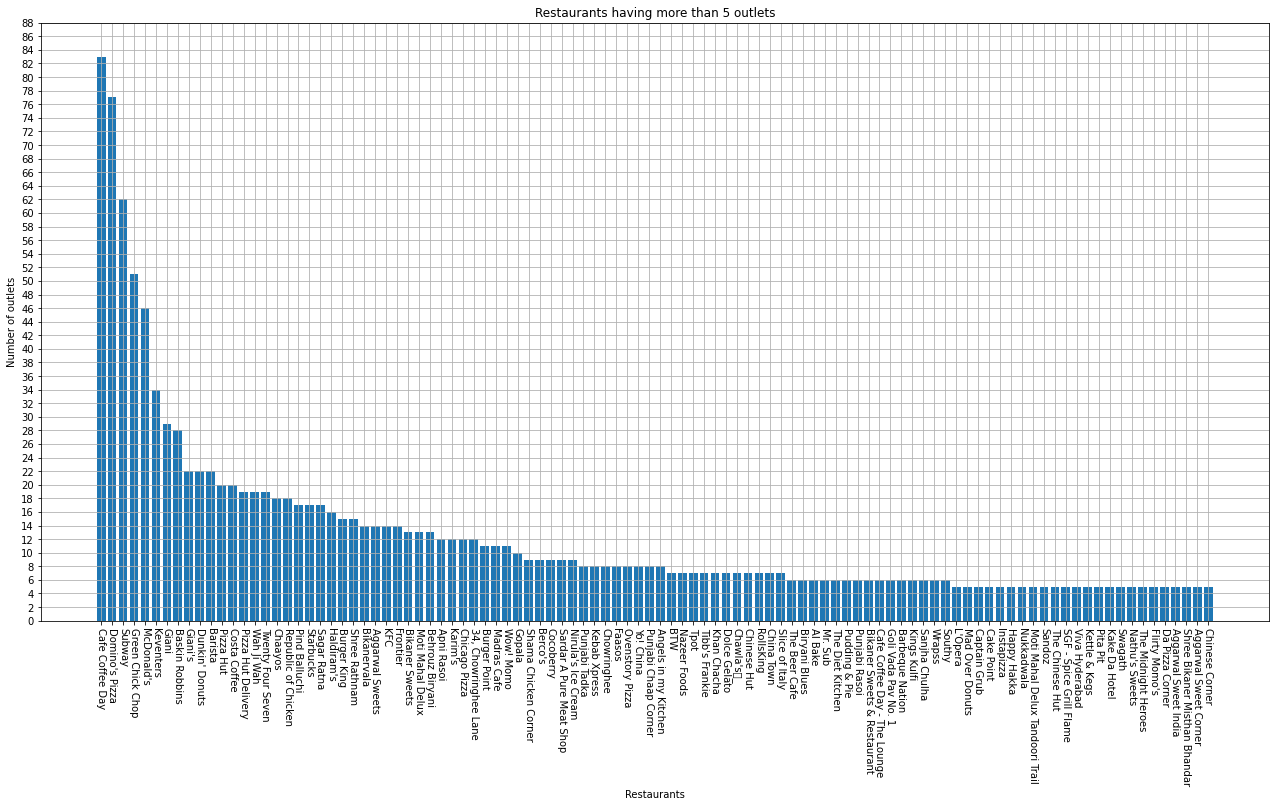

In [25]:
# Plot the restaurants having more than 5 outlets 

plt.figure(figsize=(22,11))
plt.bar(x=more_than_5_outlets.keys(),height=more_than_5_outlets.values())
plt.xlabel('Restaurants')
plt.ylabel('Number of outlets')
plt.title('Restaurants having more than 5 outlets')
plt.xticks(rotation = -90)
plt.yticks(np.arange(0,90,2))
plt.grid()
plt.show()

**Two separate analysis**
1. Restaurants having more than 5 outlets
2. All the restaurants

In [26]:
more_than_5_outlets.keys()

dict_keys(['Cafe Coffee Day', "Domino's Pizza", 'Subway', 'Green Chick Chop', "McDonald's", 'Keventers', 'Giani', 'Baskin Robbins', "Giani's", "Dunkin' Donuts", 'Barista', 'Pizza Hut', 'Costa Coffee', 'Pizza Hut Delivery', 'Wah Ji Wah', 'Twenty Four Seven', 'Chaayos', 'Republic of Chicken', 'Pind Balluchi', 'Starbucks', 'Sagar Ratna', "Haldiram's", 'Burger King', 'Shree Rathnam', 'Bikanervala', 'Aggarwal Sweets', 'KFC', 'Frontier', 'Bikaner Sweets', 'Moti Mahal Delux', 'Behrouz Biryani', 'Apni Rasoi', "Karim's", 'Chicago Pizza', '34, Chowringhee Lane', 'Burger Point', 'Madras Cafe', 'Wow! Momo', 'Gopala', 'Shama Chicken Corner', "Berco's", 'Cocoberry', 'Sardar A Pure Meat Shop', "Nirula's Ice Cream", 'Punjabi Tadka', 'Kebab Xpress', 'Chowringhee', 'Faasos', 'Ovenstory Pizza', 'Yo! China', 'Punjabi Chaap Corner', 'Angels in my Kitchen', 'BTW', 'Nazeer Foods', 'Tpot', "Tibb's Frankie", 'Khan Chacha', 'Dolce Gelato', "Chawla's\x8c_", 'Chinese Hut', 'RollsKing', 'China Town', 'Slice of Ita

In [27]:
def five_or_more_outlets(data, column):
  ''' Iterate over the column and append the data for each
      restaurant in the dataframe'''

  for col in column:
    d = zomato_ncr[zomato_ncr['Restaurant Name'] == col]
    data = pd.concat((data,d),axis=0)
  return data

In [28]:
Five_or_more_outlets = pd.DataFrame(None) # Create a dataframe

Five_or_more_outlets = five_or_more_outlets(Five_or_more_outlets, list(more_than_5_outlets.keys()))


In [29]:
list(more_than_5_outlets.keys())

['Cafe Coffee Day',
 "Domino's Pizza",
 'Subway',
 'Green Chick Chop',
 "McDonald's",
 'Keventers',
 'Giani',
 'Baskin Robbins',
 "Giani's",
 "Dunkin' Donuts",
 'Barista',
 'Pizza Hut',
 'Costa Coffee',
 'Pizza Hut Delivery',
 'Wah Ji Wah',
 'Twenty Four Seven',
 'Chaayos',
 'Republic of Chicken',
 'Pind Balluchi',
 'Starbucks',
 'Sagar Ratna',
 "Haldiram's",
 'Burger King',
 'Shree Rathnam',
 'Bikanervala',
 'Aggarwal Sweets',
 'KFC',
 'Frontier',
 'Bikaner Sweets',
 'Moti Mahal Delux',
 'Behrouz Biryani',
 'Apni Rasoi',
 "Karim's",
 'Chicago Pizza',
 '34, Chowringhee Lane',
 'Burger Point',
 'Madras Cafe',
 'Wow! Momo',
 'Gopala',
 'Shama Chicken Corner',
 "Berco's",
 'Cocoberry',
 'Sardar A Pure Meat Shop',
 "Nirula's Ice Cream",
 'Punjabi Tadka',
 'Kebab Xpress',
 'Chowringhee',
 'Faasos',
 'Ovenstory Pizza',
 'Yo! China',
 'Punjabi Chaap Corner',
 'Angels in my Kitchen',
 'BTW',
 'Nazeer Foods',
 'Tpot',
 "Tibb's Frankie",
 'Khan Chacha',
 'Dolce Gelato',
 "Chawla's\x8c_",
 'Chine

In [30]:
Five_or_more_outlets.head()

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
932,9650,Cafe Coffee Day,Faridabad,"SCF 42, Shopping Centre, Main Huda Market, Sec...",Sector 15,"Sector 15, Faridabad",77.323611,28.395267,Cafe,450,0,0,0,0,1,3.3,Orange,Average,67
1126,8590,Cafe Coffee Day,Ghaziabad,"1st Floor, Shipra Mall, Gulmohar Road, Indirap...","Shipra Mall, Indirapuram","Shipra Mall, Indirapuram, Ghaziabad",77.370208,28.634047,Cafe,450,0,0,0,0,1,3.2,Orange,Average,63
1283,631,Cafe Coffee Day,Gurgaon,"Upper Ground Floor, DLF Mega Mall, DLF Phase 1...","DLF Mega Mall, DLF Phase 1","DLF Mega Mall, DLF Phase 1, Gurgaon",77.093595,28.475489,Cafe,450,0,0,0,0,1,2.6,Orange,Average,27
1340,18161609,Cafe Coffee Day,Gurgaon,"Cyber Green, Nathupur, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",77.093271,28.494578,Cafe,450,0,0,0,0,1,3.1,Orange,Average,9
1341,611,Cafe Coffee Day,Gurgaon,"IBP Petrol Pump, Nathupur, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",77.091585,28.490350,Cafe,450,0,0,0,0,1,3.2,Orange,Average,26


In [31]:
Five_or_more_outlets.shape

(1288, 19)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


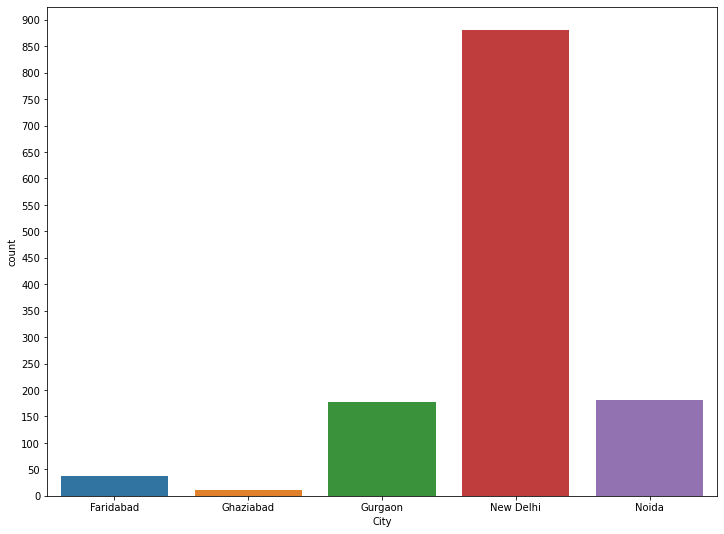

In [48]:
# Visualise the distribution of data based on city

import seaborn as sns

plt.figure(figsize=(12,9))
sns.countplot(Five_or_more_outlets['City'])
plt.yticks(np.arange(0,950,50))
plt.show()

##New Delhi



In [33]:
delhi_data = Five_or_more_outlets.groupby('City').get_group('New Delhi')


In [34]:
pd.set_option('display.max_rows',10)
delhi_data = delhi_data.reset_index()

In [45]:
delhi_data

,index,Restaurant ID,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,2592,7582,Cafe Coffee Day,New Delhi,"Nilgiri Market, Opposite Nilgiri Appartments, ...",Alaknanda,77.250146,28.528133,Cafe,450,0,0,0,0,1,3.2,Orange,Average,23
1,2754,18163907,Cafe Coffee Day,New Delhi,"Shop D, Ground Floor, DCM Building, Barakhamba...",Barakhamba Road,77.225462,28.629818,Cafe,450,0,0,0,0,1,2.9,Orange,Average,4
2,2768,7354,Cafe Coffee Day,New Delhi,"14-A, Basant Lok Market, Vasant Vihar, New Delhi","Basant Lok Market, Vasant Vihar",77.164108,28.558603,Cafe,450,0,0,0,0,1,3.2,Orange,Average,49
3,2802,18312487,Cafe Coffee Day,New Delhi,"1st Floor, BPCL Petrol Pump, Opposite Chanakya...",Chanakyapuri,77.190976,28.583433,Cafe,450,0,0,0,0,1,3.0,Orange,Average,4
4,2953,18371396,Cafe Coffee Day,New Delhi,"K-1/14, Main Road, Chittaranjan Park, New Delhi",Chittaranjan Park,77.253030,28.539373,Cafe,450,0,0,0,0,1,0.0,White,Not rated,1
5,2986,18175255,Cafe Coffee Day,New Delhi,"12, Community Centre, New Friends Colony, New ...","Community Centre, New Friends Colony",77.269265,28.562452,Cafe,450,0,0,0,0,1,2.9,Orange,Average,10
6,3001,596,Cafe Coffee Day,New Delhi,"4, Rajiv Chowk, Connaught Place, New Delhi",Connaught Place,77.219813,28.632961,Cafe,450,0,1,0,0,1,3.4,Orange,Average,277
7,3141,5464,Cafe Coffee Day,New Delhi,"3631, Ground Floor, Hameed Manzil, Near Golcha...",Daryaganj,77.240291,28.644590,Cafe,450,0,0,0,0,1,2.8,Orange,Average,22
8,3163,18466971,Cafe Coffee Day,New Delhi,"MBD House, Gulab Bhavan, 6 Bhadurshah Zafar Ma...",Daryaganj,0.000000,0.000000,Cafe,450,0,0,0,0,1,0.0,White,Not rated,0
9,3279,9014,Cafe Coffee Day,New Delhi,"61, Ground Floor, Kingsway Camp, Mall Road, De...",Delhi University-GTB Nagar,77.206386,28.698453,Cafe,450,0,0,0,0,1,3.4,Orange,Average,46


In [36]:
delhi_data[['Locality','Locality Verbose']]

,Locality,Locality Verbose
0,Alaknanda,"Alaknanda, New Delhi"
1,Barakhamba Road,"Barakhamba Road, New Delhi"
2,"Basant Lok Market, Vasant Vihar","Basant Lok Market, Vasant Vihar, New Delhi"
3,Chanakyapuri,"Chanakyapuri, New Delhi"
4,Chittaranjan Park,"Chittaranjan Park, New Delhi"
...,...,...
876,Vasundhara Enclave,"Vasundhara Enclave, New Delhi"
877,MG Road,"MG Road, New Delhi"
878,Moti Nagar,"Moti Nagar, New Delhi"
879,Okhla Phase 1,"Okhla Phase 1, New Delhi"


In [37]:
delhi_data.drop('Locality Verbose',axis=1,inplace=True)

In [38]:
# Visualize the distribution of locality
pd.set_option('display.max_rows',None)
delhi_data['Locality'].value_counts().sort_values(ascending = False)

Connaught Place                         25
Rajinder Nagar                          19
Karol Bagh                              17
Rohini                                  17
Netaji Subhash Place                    16
Malviya Nagar                           16
Greater Kailash (GK) 2                  16
Punjabi Bagh                            15
Moments Mall, Kirti Nagar               15
Laxmi Nagar                             15
Kamla Nagar                             15
Defence Colony                          14
V3S Mall, Laxmi Nagar                   14
East Patel Nagar                        13
Green Park                              13
Jail Road                               13
Shahdara                                13
Janakpuri                               13
Shalimar Bagh                           12
Jangpura                                12
Preet Vihar                             12
Nehru Place                             12
Pacific Mall, Tagore Garden             12
Kalkaji    

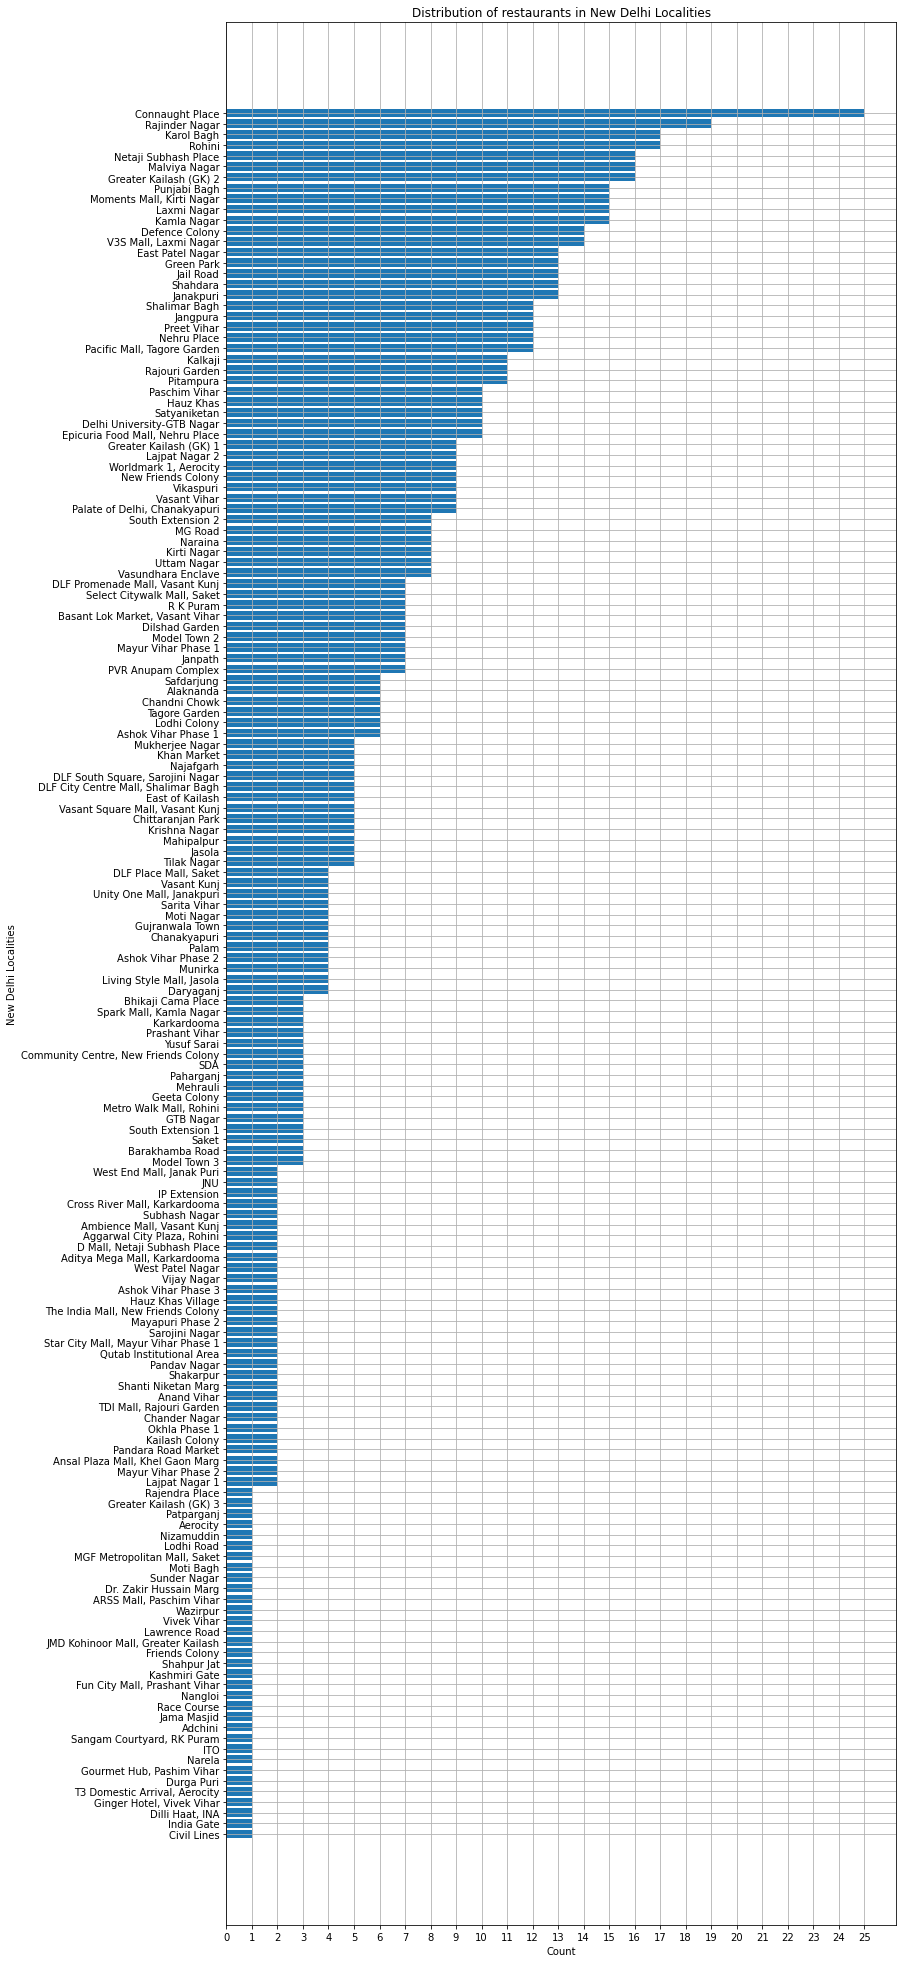

In [47]:
plt.figure(figsize=(12,35))
plt.barh(delhi_data['Locality'].value_counts().sort_values().index,delhi_data['Locality'].value_counts().sort_values())
plt.ylabel('New Delhi Localities')
plt.xlabel('Count')
plt.title('Distribution of restaurants in New Delhi Localities')
plt.xticks(np.arange(0,26,1))
plt.grid()
plt.show()

**Inference**


*   Posh areas have more number of outlets.
*   South Delhi Areas have more number of outlets as compared to other parts of Delhi.



In [50]:
delhi_data


,index,Restaurant ID,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,2592,7582,Cafe Coffee Day,New Delhi,"Nilgiri Market, Opposite Nilgiri Appartments, ...",Alaknanda,77.250146,28.528133,Cafe,450,0,0,0,0,1,3.2,Orange,Average,23
1,2754,18163907,Cafe Coffee Day,New Delhi,"Shop D, Ground Floor, DCM Building, Barakhamba...",Barakhamba Road,77.225462,28.629818,Cafe,450,0,0,0,0,1,2.9,Orange,Average,4
2,2768,7354,Cafe Coffee Day,New Delhi,"14-A, Basant Lok Market, Vasant Vihar, New Delhi","Basant Lok Market, Vasant Vihar",77.164108,28.558603,Cafe,450,0,0,0,0,1,3.2,Orange,Average,49
3,2802,18312487,Cafe Coffee Day,New Delhi,"1st Floor, BPCL Petrol Pump, Opposite Chanakya...",Chanakyapuri,77.190976,28.583433,Cafe,450,0,0,0,0,1,3.0,Orange,Average,4
4,2953,18371396,Cafe Coffee Day,New Delhi,"K-1/14, Main Road, Chittaranjan Park, New Delhi",Chittaranjan Park,77.253030,28.539373,Cafe,450,0,0,0,0,1,0.0,White,Not rated,1
5,2986,18175255,Cafe Coffee Day,New Delhi,"12, Community Centre, New Friends Colony, New ...","Community Centre, New Friends Colony",77.269265,28.562452,Cafe,450,0,0,0,0,1,2.9,Orange,Average,10
6,3001,596,Cafe Coffee Day,New Delhi,"4, Rajiv Chowk, Connaught Place, New Delhi",Connaught Place,77.219813,28.632961,Cafe,450,0,1,0,0,1,3.4,Orange,Average,277
7,3141,5464,Cafe Coffee Day,New Delhi,"3631, Ground Floor, Hameed Manzil, Near Golcha...",Daryaganj,77.240291,28.644590,Cafe,450,0,0,0,0,1,2.8,Orange,Average,22
8,3163,18466971,Cafe Coffee Day,New Delhi,"MBD House, Gulab Bhavan, 6 Bhadurshah Zafar Ma...",Daryaganj,0.000000,0.000000,Cafe,450,0,0,0,0,1,0.0,White,Not rated,0
9,3279,9014,Cafe Coffee Day,New Delhi,"61, Ground Floor, Kingsway Camp, Mall Road, De...",Delhi University-GTB Nagar,77.206386,28.698453,Cafe,450,0,0,0,0,1,3.4,Orange,Average,46


In [51]:
for restaurant, cuisine in zip(delhi_data['Restaurant Name'], delhi_data['Cuisines']):
  print(restaurant + " : " + cuisine)

Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee Day : Cafe
Cafe Coffee

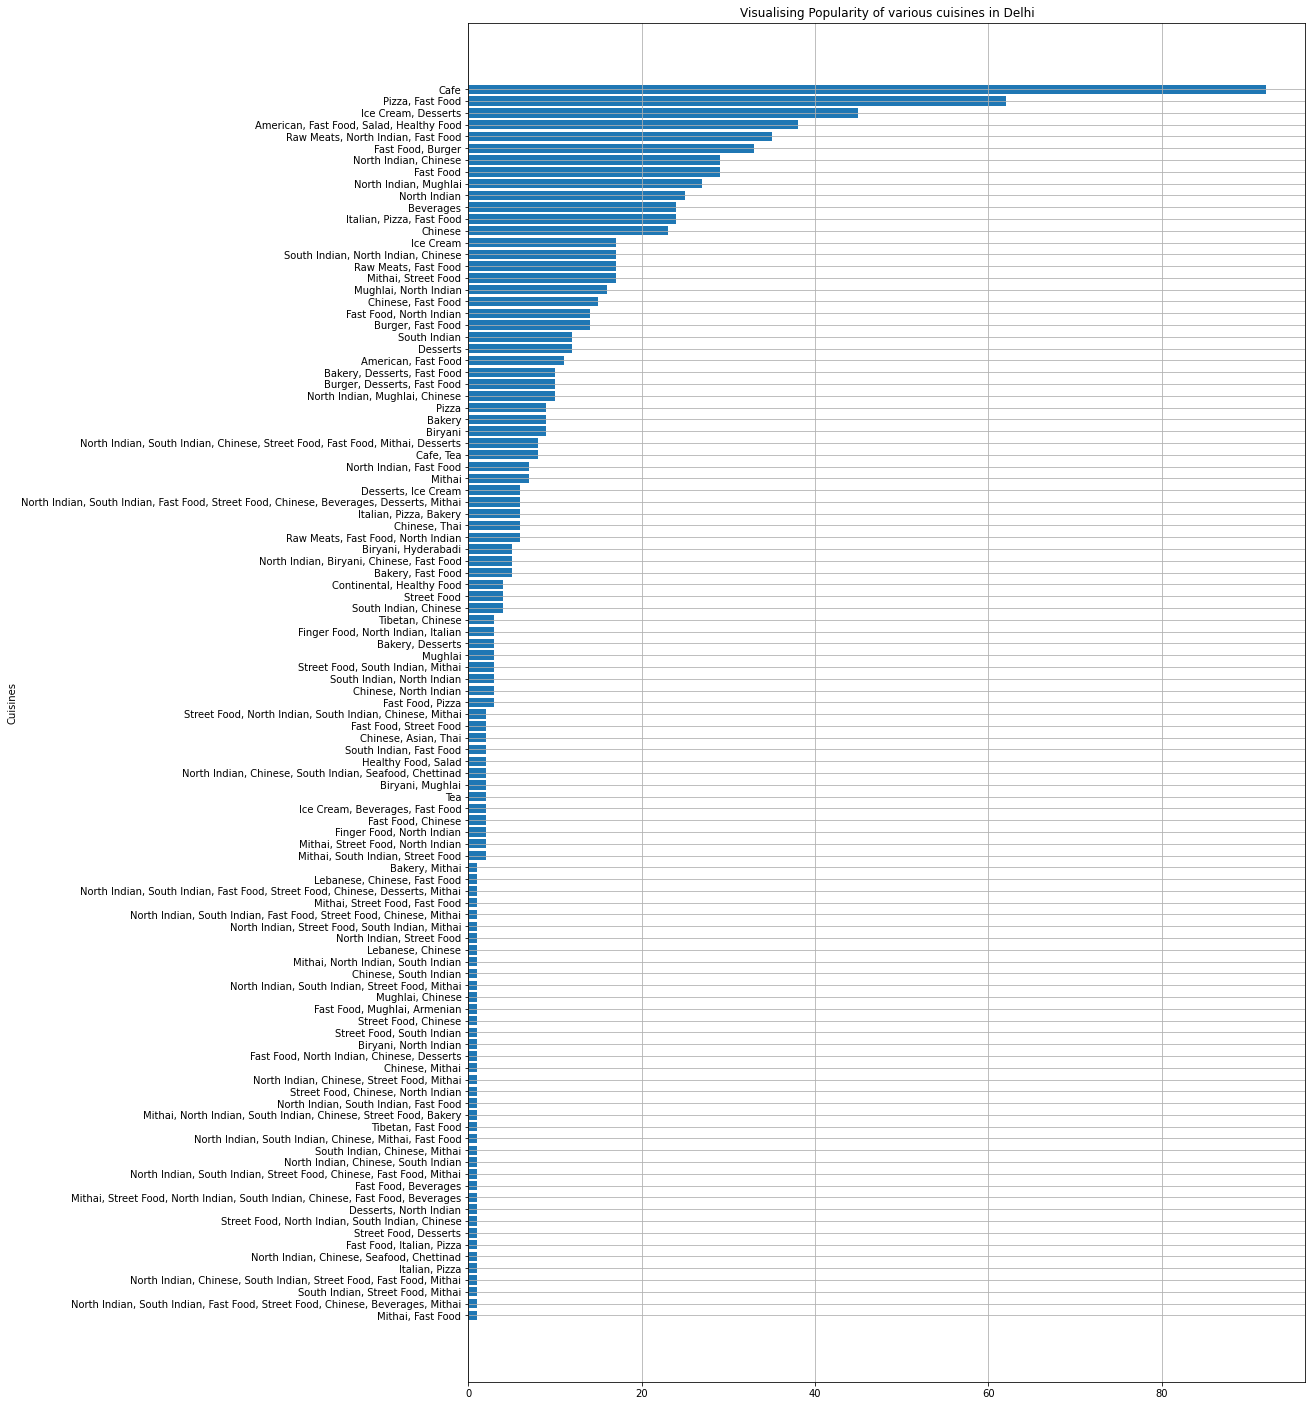

In [52]:
plt.figure(figsize=(15,25))
plt.barh(delhi_data['Cuisines'].value_counts().sort_values().index, delhi_data['Cuisines'].value_counts().sort_values())
plt.ylabel("Cuisines")
plt.title('Visualising Popularity of various cuisines in Delhi')
plt.grid()
plt.show()

**Fast Food is the most trending cuisine**

In [57]:
# Create competitor data

'''Competitors are those who are selling Mughlai, Fast Food, American, Pizza, and Burger'''

comp_rest = set() # What is the use of set?
for restaurant, cuisine in zip(delhi_data['Restaurant Name'], delhi_data['Cuisines']):

  if 'Mughlai' in cuisine or 'Fast Food' in cuisine or 'American' in cuisine or 'Pizza' in cuisine or 'Burger' in cuisine or 'Biryani' in cuisine:
    comp_rest.add(restaurant)

In [59]:
len(comp_rest)

61

In [61]:
comp_data = pd.DataFrame(None)
for col in comp_rest:
  d = delhi_data[delhi_data['Restaurant Name']==col]
  comp_data = pd.concat((comp_data,d),axis=0)

In [63]:
len(comp_data)

544

In [64]:
comp_data.groupby('Restaurant Name').mean()

,index,Restaurant ID,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
Restaurant Name,,,,,,,,,,,,
"34, Chowringhee Lane",5893.750000,7.688462e+06,77.151342,28.639963,316.666667,0.000000,0.250000,0.0,0.0,1.000000,2.791667,64.750000
Aggarwal Sweet India,5432.600000,3.808495e+06,77.242931,28.645353,170.000000,0.000000,0.000000,0.0,0.0,1.000000,1.700000,7.000000
Al Bake,5250.000000,1.576970e+05,77.248750,28.537834,450.000000,0.000000,0.000000,0.0,0.0,1.500000,2.700000,73.250000
Angels in my Kitchen,5632.000000,1.052962e+05,77.204465,28.557906,350.000000,0.000000,1.000000,0.0,0.0,1.000000,3.383333,158.666667
Apni Rasoi,5408.222222,6.152069e+06,77.183543,28.669503,355.555556,0.000000,0.111111,0.0,0.0,1.111111,1.933333,36.111111
Behrouz Biryani,5340.333333,1.837766e+07,77.186366,28.599538,600.000000,0.000000,1.000000,0.0,0.0,2.000000,3.044444,38.222222
Bikaner Sweets,5305.818182,3.457505e+06,77.214406,28.589571,190.909091,0.000000,0.000000,0.0,0.0,1.000000,1.581818,7.818182
Bikanervala,5280.090909,1.734738e+06,77.182826,28.630776,536.363636,0.000000,0.454545,0.0,0.0,1.909091,3.072727,136.818182
Biryani Blues,5767.800000,1.833831e+07,77.191803,28.562295,950.000000,0.200000,0.800000,0.0,0.0,2.800000,3.700000,151.600000


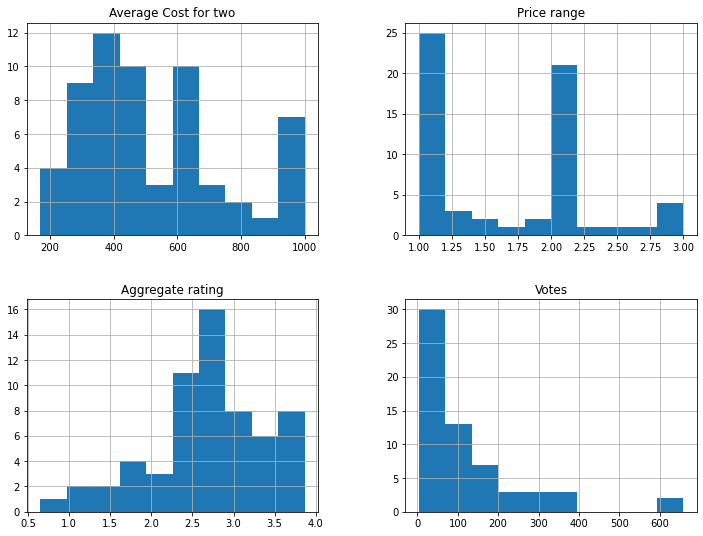

In [73]:
mean_comp_data = comp_data.groupby('Restaurant Name').mean()[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']]
mean_comp_data.hist(figsize=(12,9))
plt.show()

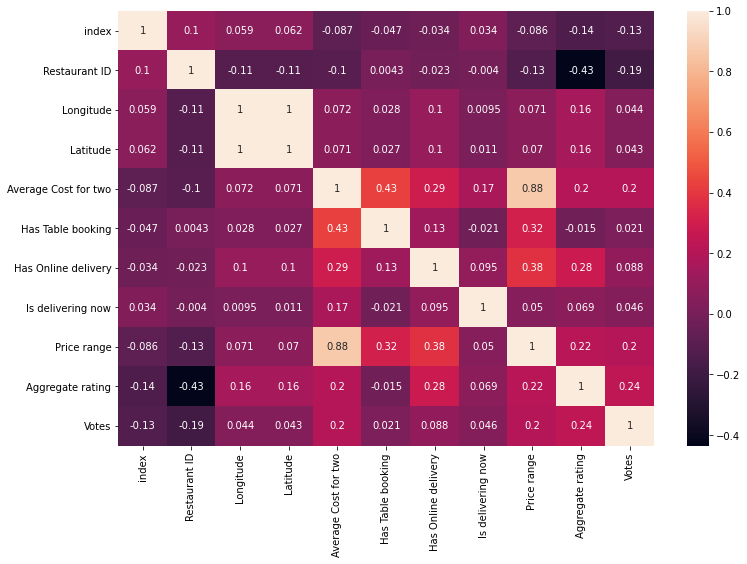

In [74]:
# Let's check if there's any correlation in the competitor data

import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(comp_data.drop('Switch to order menu',axis=1).corr(),annot=True)


**Inference**


*   The average cost for two of my competitors is majorly between INR 200-800 
*   The price range is between 1 and 3, most of them having 1
*   There is a positive correlation between Average Cost for two and Has Online Delivery and Has Table booking





/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)


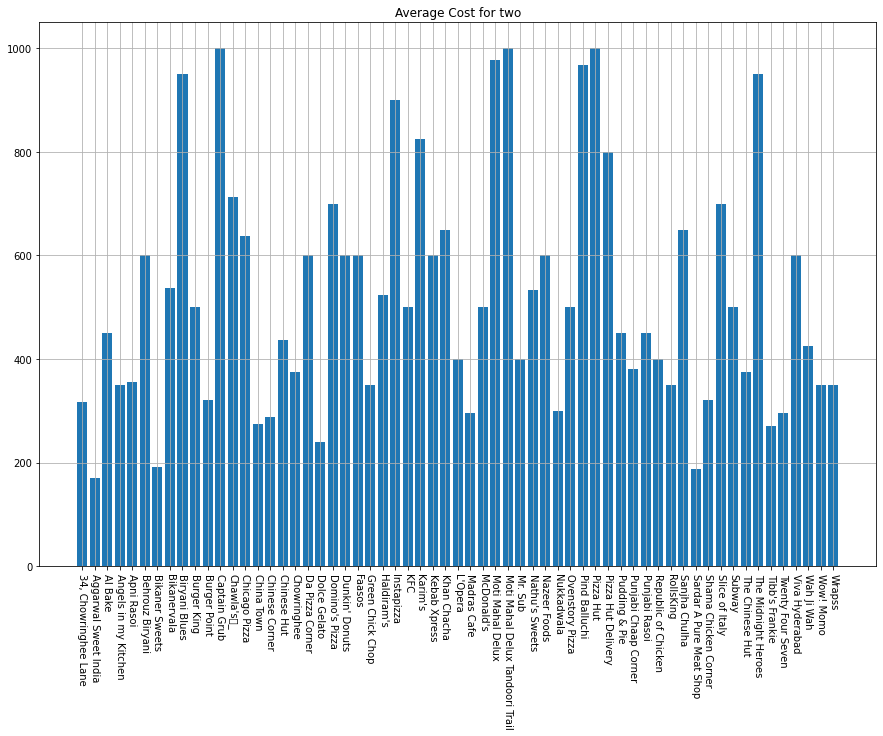

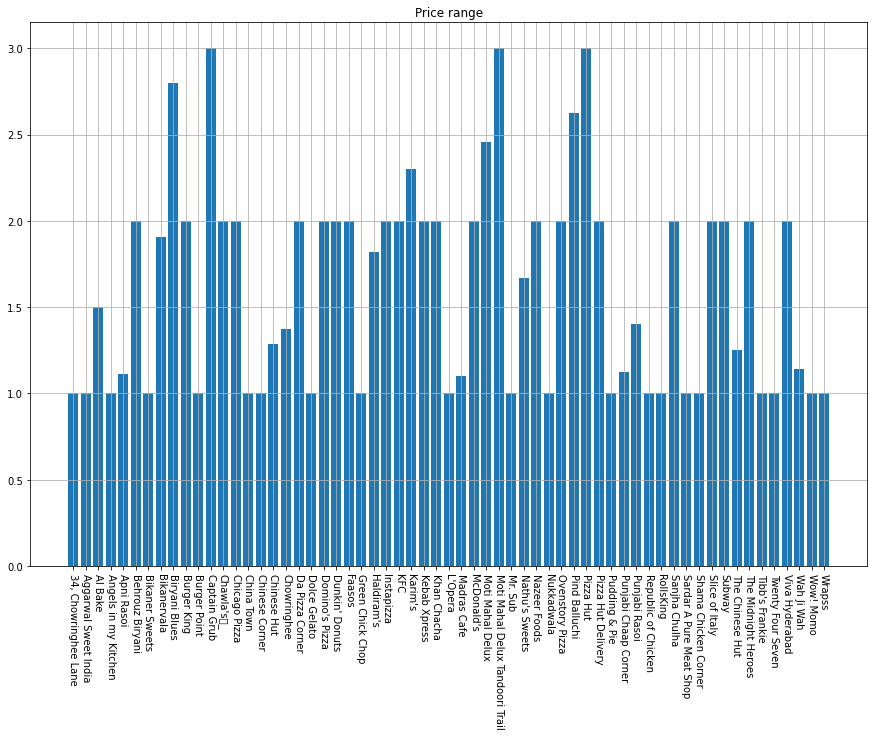

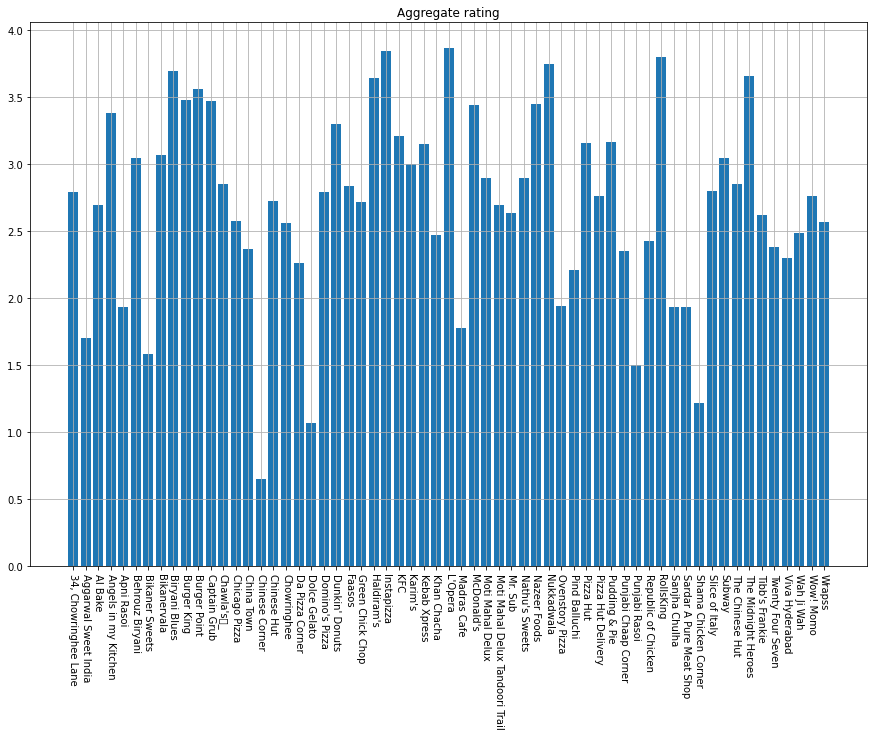

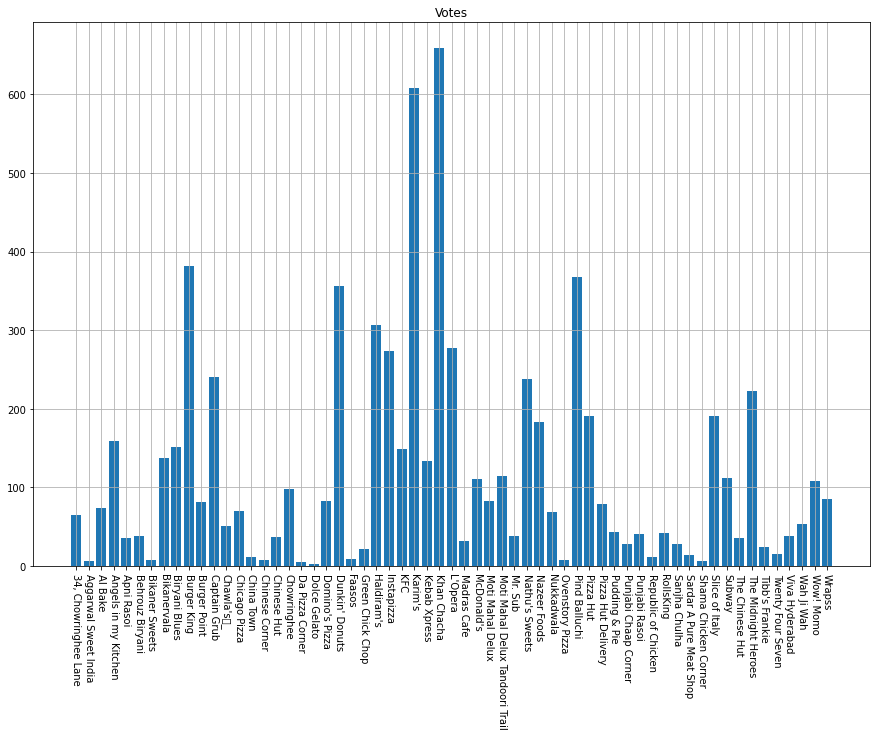

In [75]:
for col in mean_comp_data.columns:
  plt.figure(figsize = (15, 10))
  plt.bar(mean_comp_data.index, mean_comp_data[col])
  plt.title(col)
  plt.grid()
  plt.xticks(rotation = -90)
  plt.show()

In [68]:
top_competitors = ['KFC', "Biryani Blues", "Burger King", "Captain Grub", "Domino's Pizza", "Dunkin' Donuts", "Karim's", "Kebab Xpress", "Khan Chacha", "McDonalds", "Nazeer Foods", "Faasos", " Ovenstoy Pizza", "Pizza Hut", "Wow! Momo"]

In [69]:
!pip install gmplot

     |████████████████████████████████| 174kB 5.1MB/s 


In [70]:
import gmplot

In [71]:
competitor_restaurants

{'34, Chowringhee Lane',
 'Aggarwal Sweet India',
 'Al Bake',
 'Angels in my Kitchen',
 'Apni Rasoi',
 'Behrouz Biryani',
 'Bikaner Sweets',
 'Bikanervala',
 'Biryani Blues',
 'Burger King',
 'Burger Point',
 'Captain Grub',
 "Chawla's\x8c_",
 'Chicago Pizza',
 'China Town',
 'Chinese Corner',
 'Chinese Hut',
 'Chowringhee',
 'Da Pizza Corner',
 'Dolce Gelato',
 "Domino's Pizza",
 "Dunkin' Donuts",
 'Faasos',
 'Green Chick Chop',
 "Haldiram's",
 'Instapizza',
 'KFC',
 "Karim's",
 'Kebab Xpress',
 'Khan Chacha',
 "L'Opera",
 'Madras Cafe',
 "McDonald's",
 'Moti Mahal Delux',
 'Moti Mahal Delux Tandoori Trail',
 'Mr. Sub',
 "Nathu's Sweets",
 'Nazeer Foods',
 'Nukkadwala',
 'Ovenstory Pizza',
 'Pind Balluchi',
 'Pizza Hut',
 'Pizza Hut Delivery',
 'Pudding & Pie',
 'Punjabi Chaap Corner',
 'Punjabi Rasoi',
 'Republic of Chicken',
 'RollsKing',
 'Sanjha Chulha',
 'Sardar A Pure Meat Shop',
 'Shama Chicken Corner',
 'Slice of Italy',
 'Subway',
 'The Chinese Hut',
 'The Midnight Heroes',
 

In [77]:
delhi_latitude_KFC = comp_data[comp_data['Restaurant Name'] == 'KFC']['Latitude'].values # Latitude of locations in Delhi for KFC
delhi_longitude_KFC = comp_data[comp_data['Restaurant Name'] == 'KFC']['Longitude'].values # Longitude of locations in Delhi for KFC
gmap = gmplot.GoogleMapPlotter(28.7041, 77.1025, 20) # Creates a map
gmap.scatter(delhi_latitude_KFC, delhi_longitude_KFC, color = 'red', size = 500, marker = False)

delhi_latitude_dominos = comp_data[comp_data['Restaurant Name'] == "Domino's Pizza"]['Latitude'].values # Latitude of locations in Delhi for Domino's Pizza
delhi_longitude_dominos = comp_data[comp_data['Restaurant Name'] == "Domino's Pizza"]['Longitude'].values # Longitude of locations in Delhi for Domino's Pizza
gmap.scatter(delhi_latitude_dominos, delhi_longitude_dominos, color = 'blue', size = 500, marker = False)

delhi_latitude_kebab = comp_data[comp_data['Restaurant Name'] == 'Kebab Xpress']['Latitude'].values # Latitude of locations in Delhi for Kebab Express
delhi_longitude_kebab = comp_data[comp_data['Restaurant Name'] == 'Kebab Xpress']['Longitude'].values # Longitude of locations in Delhi for Kebab express
gmap.scatter(delhi_latitude_kebab, delhi_longitude_kebab, color = 'yellow', size = 500, marker = False)

gmap.draw("/content/map1.html")

In [79]:
# Create a google map object
def create_googlemap(data, columns):
  
  # Map object
  gmap = gmplot.GoogleMapPlotter(28.7041, 77.1025, 20)
  for col in columns:

    # create latitude and longitude
    latitude = data[data['Restaurant Name'] == col]['Latitude'].values # Extracts latitude
    longitude = data[data['Restaurant Name'] == col]['Longitude'].values # extracts longitude
    gmap.scatter(latitude, longitude, color = 'red', size = 300, marker = False) # Plots the scatter plot
    gmap.draw("/content/map.html") # Save


# Call the above method
create_googlemap(comp_data, comp_rest)




In [82]:
import os
os.mkdir("/content/maps") # Creates a dorectory


In [83]:
# Create individual maps
def create_individual_googlemap(data, columns):
  
  for col in columns:

    # Map object
    gmap = gmplot.GoogleMapPlotter(28.7041, 77.1025, 20)
    # create latitude and longitude
    latitude = data[data['Restaurant Name'] == col]['Latitude'].values
    longitude = data[data['Restaurant Name'] == col]['Longitude'].values
    gmap.scatter(latitude, longitude, color = 'red', size = 300, marker = True)
    gmap.draw("/content/maps/" + col  + ".html")

# Call the above method
create_individual_googlemap(comp_data, comp_rest)

In [84]:
# Download the maps
!zip -r /content/maps.zip /content/maps # Creating a zip folder

  adding: content/maps/ (stored 0%)
  adding: content/maps/Kebab Xpress.html (deflated 48%)
  adding: content/maps/Aggarwal Sweet India.html (deflated 51%)
  adding: content/maps/Nazeer Foods.html (deflated 48%)
  adding: content/maps/The Chinese Hut.html (deflated 48%)
  adding: content/maps/Shama Chicken Corner.html (deflated 51%)
  adding: content/maps/Tibb's Frankie.html (deflated 51%)
  adding: content/maps/Biryani Blues.html (deflated 51%)
  adding: content/maps/Punjabi Rasoi.html (deflated 50%)
  adding: content/maps/Mr. Sub.html (deflated 51%)
  adding: content/maps/Punjabi Chaap Corner.html (deflated 58%)
  adding: content/maps/Chawla's_.html (deflated 48%)
  adding: content/maps/Nathu's Sweets.html (deflated 44%)
  adding: content/maps/Bikaner Sweets.html (deflated 63%)
  adding: content/maps/Dolce Gelato.html (deflated 44%)
  adding: content/maps/Sardar A Pure Meat Shop.html (deflated 58%)
  adding: content/maps/Apni Rasoi.html (deflated 60%)
  adding: content/maps/Instapiz